## Data Wrangling

***

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Train Data

Total Profit:  817.0769399999997
Winning Trades:  7894
Losing Trades:  3894
Win Rate:  0.669664065151001
Mean Trade:  1.0145979522422086


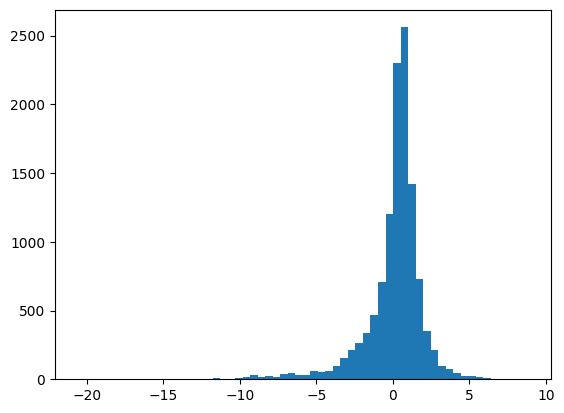

In [2]:
# Activity log df
conn1 = sqlite3.connect("ledger_train.db")
c1 = conn1.cursor()

c1.execute("""SELECT * FROM activity_log""")
items_log = c1.fetchall()
items_log_df = pd.DataFrame(items_log, columns=["Pair", "Z-Score", "Pair 1 Price", "Pair 2 Price", "Date Time"]).drop("Date Time", axis=1)

# Trade log df and find profit
c1.execute("""SELECT * FROM tx_ledger WHERE status = 'CLOSED' """)
trade_log = c1.fetchall()
trade_log_df = pd.DataFrame(trade_log, columns=["Pair", "Type", "Open Date", "Close Date", "Status", "Units 1", "Units 2", "Pair 1 O", "Pair 2 O", "Pair 1 C", "Pair 2 C"]).drop(["Open Date", "Close Date"], axis=1)

trade_log_df = trade_log_df.dropna()

trade_log_df["Profit Pair 1"] = trade_log_df["Units 1"] * trade_log_df["Pair 1 C"] - trade_log_df["Units 1"] * trade_log_df["Pair 1 O"]
trade_log_df["Profit Pair 2"] = trade_log_df["Units 2"] * trade_log_df["Pair 2 C"] - trade_log_df["Units 2"] * trade_log_df["Pair 2 O"]

trade_log_df["Profit Pair 1"] = np.where(trade_log_df["Type"] == "Long", trade_log_df["Profit Pair 1"]*1, trade_log_df["Profit Pair 1"]*-1)
trade_log_df["Profit Pair 2"] = np.where(trade_log_df["Type"] == "Long", trade_log_df["Profit Pair 2"]*-1, trade_log_df["Profit Pair 2"]*1)

trade_log_df["Profit"] = trade_log_df["Profit Pair 1"] + trade_log_df["Profit Pair 2"]

print("Total Profit: ", trade_log_df["Profit"].sum())
print("Winning Trades: ", len(trade_log_df[trade_log_df["Profit"] > 0]))
print("Losing Trades: ", len(trade_log_df[trade_log_df["Profit"] < 0]))
print("Win Rate: ", len(trade_log_df[trade_log_df["Profit"] > 0]) / (len(trade_log_df[trade_log_df["Profit"] > 0]) + len(trade_log_df[trade_log_df["Profit"] < 0])))
print("Mean Trade: ", trade_log_df[trade_log_df["Profit"] > 0]["Profit"].mean())

import matplotlib.pyplot as plt
plt.hist(trade_log_df[trade_log_df["Profit"] != 0]["Profit"], bins=60)
plt.show()

### Test Data

Total Profit:  231.2925099999978
Winning Trades:  782
Losing Trades:  288
Win Rate:  0.7308411214953271
Mean Trade:  0.5775387915601004


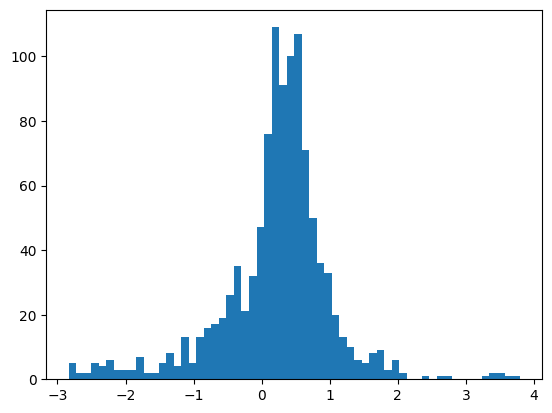

In [3]:
# Activity log df
conn2 = sqlite3.connect("ledger_test.db")
c2 = conn2.cursor()

c2.execute("""SELECT * FROM activity_log""")
items_log = c2.fetchall()
items_log_df = pd.DataFrame(items_log, columns=["Pair", "Z-Score", "Pair 1 Price", "Pair 2 Price", "Date Time"]).drop("Date Time", axis=1)

# Trade log df and find profit
c2.execute("""SELECT * FROM tx_ledger WHERE status = 'CLOSED' """)
trade_log = c2.fetchall()
trade_log_df = pd.DataFrame(trade_log, columns=["Pair", "Type", "Open Date", "Close Date", "Status", "Units 1", "Units 2", "Pair 1 O", "Pair 2 O", "Pair 1 C", "Pair 2 C"]).drop(["Open Date", "Close Date"], axis=1)

trade_log_df = trade_log_df.dropna()

trade_log_df["Profit Pair 1"] = trade_log_df["Units 1"] * trade_log_df["Pair 1 C"] - trade_log_df["Units 1"] * trade_log_df["Pair 1 O"]
trade_log_df["Profit Pair 2"] = trade_log_df["Units 2"] * trade_log_df["Pair 2 C"] - trade_log_df["Units 2"] * trade_log_df["Pair 2 O"]

trade_log_df["Profit Pair 1"] = np.where(trade_log_df["Type"] == "Long", trade_log_df["Profit Pair 1"]*1, trade_log_df["Profit Pair 1"]*-1)
trade_log_df["Profit Pair 2"] = np.where(trade_log_df["Type"] == "Long", trade_log_df["Profit Pair 2"]*-1, trade_log_df["Profit Pair 2"]*1)

trade_log_df["Profit"] = trade_log_df["Profit Pair 1"] + trade_log_df["Profit Pair 2"]

print("Total Profit: ", trade_log_df["Profit"].sum())
print("Winning Trades: ", len(trade_log_df[trade_log_df["Profit"] > 0]))
print("Losing Trades: ", len(trade_log_df[trade_log_df["Profit"] < 0]))
print("Win Rate: ", len(trade_log_df[trade_log_df["Profit"] > 0]) / (len(trade_log_df[trade_log_df["Profit"] > 0]) + len(trade_log_df[trade_log_df["Profit"] < 0])))
print("Mean Trade: ", trade_log_df[trade_log_df["Profit"] > 0]["Profit"].mean())

import matplotlib.pyplot as plt
plt.hist(trade_log_df[trade_log_df["Profit"] != 0]["Profit"], bins=60)
plt.show()